# Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>1. Naive Bayes </h1>

## 1.1 Loading Data

In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os

#import plotly
#import plotly.offline as offline
#import plotly.graph_objs as go
#offline.init_notebook_mode()
from collections import Counter

In [4]:
data = pd.read_csv('preprocessed_data.csv')

In [8]:
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [9]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


In [10]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [11]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [12]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train, random_state=0)

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [1]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h3> 1.3.1 Essay - BOW Representation:

In [72]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


essay_vectorizer_bow = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
essay_vectorizer_bow.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = essay_vectorizer_bow.transform(X_train['essay'].values)
X_cv_essay_bow = essay_vectorizer_bow.transform(X_cv['essay'].values)
X_test_essay_bow = essay_vectorizer_bow.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

(49041, 8) (49041,)
(24155, 8) (24155,)
(36052, 8) (36052,)
After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


<h3> 1.3.2 Essay - TFIDF Representation:

In [73]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

essay_vectorizer_tfidf = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
essay_vectorizer_tfidf.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted TfidfVectorizer to convert the text to vector
X_train_essay_tfidf = essay_vectorizer_tfidf.transform(X_train['essay'].values)
X_cv_essay_tfidf = essay_vectorizer_tfidf.transform(X_cv['essay'].values)
X_test_essay_tfidf = essay_vectorizer_tfidf.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

(49041, 8) (49041,)
(24155, 8) (24155,)
(36052, 8) (36052,)
After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [74]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h3>1.4.1 encoding categorical features: School State</h3>

In [75]:
school_state_vectorizer = CountVectorizer()
school_state_vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = school_state_vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = school_state_vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = school_state_vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(school_state_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


<h3>1.4.2 encoding categorical features: teacher_prefix</h3>

In [76]:
teacher_prefix_vectorizer = CountVectorizer()
teacher_prefix_vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = teacher_prefix_vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = teacher_prefix_vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = teacher_prefix_vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(teacher_prefix_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


<h3>1.4.3 encoding categorical features: project_grade_category</h3>

In [77]:
project_grade_category_vectorizer = CountVectorizer()
project_grade_category_vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = project_grade_category_vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = project_grade_category_vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = project_grade_category_vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(project_grade_category_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


<h3>1.4.4 encoding categorical features: clean_categories</h3>

In [78]:
clean_categories_vectorizer = CountVectorizer()
clean_categories_vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_categories_ohe = clean_categories_vectorizer.transform(X_train['clean_categories'].values)
X_cv_categories_ohe = clean_categories_vectorizer.transform(X_cv['clean_categories'].values)
X_test_categories_ohe = clean_categories_vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_categories_ohe.shape, y_train.shape)
print(X_cv_categories_ohe.shape, y_cv.shape)
print(X_test_categories_ohe.shape, y_test.shape)
print(clean_categories_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


<h3>1.4.5 encoding categorical features: clean_subcategories</h3>

In [79]:
clean_subcategories_vectorizer = CountVectorizer()
clean_subcategories_vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_subcategories_ohe = clean_subcategories_vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_subcategories_ohe = clean_subcategories_vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_subcategories_ohe = clean_subcategories_vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_subcategories_ohe.shape, y_train.shape)
print(X_cv_subcategories_ohe.shape, y_cv.shape)
print(X_test_subcategories_ohe.shape, y_test.shape)
print(clean_subcategories_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


<h3>1.4.6 encoding numerical features: Price</h3>

In [13]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm =normalizer.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

#Reshaping so that the number of rows of the features is same for all data
X_train_price_norm=X_train_price_norm.reshape(-1,1)
X_cv_price_norm=X_cv_price_norm.reshape(-1,1)
X_test_price_norm=X_test_price_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

ValueError: X has 24155 features, but Normalizer is expecting 49041 features as input.

In [19]:
a= np.array([1,2,3,4,5])
b=np.array([1,3,4])
norm=Normalizer()
a_t = norm.fit(a.reshape(1,-1))
a_t = norm.transform(a.reshape(1,-1))

In [20]:
a_t

array([[0.13483997, 0.26967994, 0.40451992, 0.53935989, 0.67419986]])

In [110]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train= np.asarray([1,0,1,0,1,0])
X_test = np.asarray([1,4,6,7,2,2,2])


In [111]:
X_train.shape

(6,)

In [112]:
#a = sc_X.fit(X_train.reshape(-1,1))
#X_train_a = sc_X.transform(X_train.reshape(-1,1))

In [113]:
a = sc_X.fit(X_train.reshape(-1,1))
X_train_a = sc_X.transform(X_train.reshape(-1,1))
X_test_a = sc_X.transform(X_test.reshape(-1,1))

In [115]:
X_test_a

array([[ 1.],
       [ 7.],
       [11.],
       [13.],
       [ 3.],
       [ 3.],
       [ 3.]])

In [81]:
print(X_train_price_norm)

[[2.57546005e-03]
 [8.48979385e-04]
 [6.00009026e-05]
 ...
 [8.02237823e-04]
 [1.22104222e-02]
 [4.56922613e-03]]


<h3>1.4.7 encoding numerical features: teacher_number_of_previously_posted_projects</h3>

In [82]:
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teacher_num_previous_projects_norm =normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_teacher_num_previous_projects_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_teacher_num_previous_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

#Reshaping so that the number of rows of the features is same for all data
X_train_teacher_num_previous_projects_norm=X_train_teacher_num_previous_projects_norm.reshape(-1,1)
X_cv_teacher_num_previous_projects_norm=X_cv_teacher_num_previous_projects_norm.reshape(-1,1)
X_test_teacher_num_previous_projects_norm=X_test_teacher_num_previous_projects_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_teacher_num_previous_projects_norm.shape, y_train.shape)
print(X_cv_teacher_num_previous_projects_norm.shape, y_cv.shape)
print(X_test_teacher_num_previous_projects_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [83]:
X_train_teacher_num_previous_projects_norm

array([[0.00135628],
       [0.00648002],
       [0.        ],
       ...,
       [0.00180838],
       [0.0003014 ],
       [0.00226047]])


### 1.4.5 Concatinating all the features

In [84]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_bow = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_categories_ohe, X_train_subcategories_ohe, X_train_price_norm, X_train_teacher_num_previous_projects_norm)).tocsr()
X_cr_bow = hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_categories_ohe, X_cv_subcategories_ohe, X_cv_price_norm, X_cv_teacher_num_previous_projects_norm)).tocsr()
X_te_bow = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_categories_ohe, X_test_subcategories_ohe, X_test_teacher_num_previous_projects_norm, X_test_price_norm)).tocsr()

print("Final Data matrix - BOW:")
print(X_tr_bow.shape, y_train.shape)
print(X_cr_bow.shape, y_cv.shape)
print(X_te_bow.shape, y_test.shape)
print("="*100)

Final Data matrix - BOW:
(49041, 5101) (49041,)
(24155, 5101) (24155,)
(36052, 5101) (36052,)


In [85]:
X_tr_tfidf = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_categories_ohe, X_train_subcategories_ohe, X_train_price_norm, X_train_teacher_num_previous_projects_norm)).tocsr()
X_cr_tfidf = hstack((X_cv_essay_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_categories_ohe, X_cv_subcategories_ohe, X_cv_price_norm, X_cv_teacher_num_previous_projects_norm)).tocsr()
X_te_tfidf = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_categories_ohe, X_test_subcategories_ohe, X_test_teacher_num_previous_projects_norm, X_test_price_norm)).tocsr()

print("Final Data matrix - TFIDF")
print(X_tr_tfidf.shape, y_train.shape)
print(X_cr_tfidf.shape, y_cv.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)

Final Data matrix - TFIDF
(49041, 5101) (49041,)
(24155, 5101) (24155,)
(36052, 5101) (36052,)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 1.5.1 Set 1:  categorical, numerical features + preprocessed_essay (BOW)

In [86]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h3> 1.5.1.1 Hyperparameter tuning using simple for loop

In [87]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.88it/s]


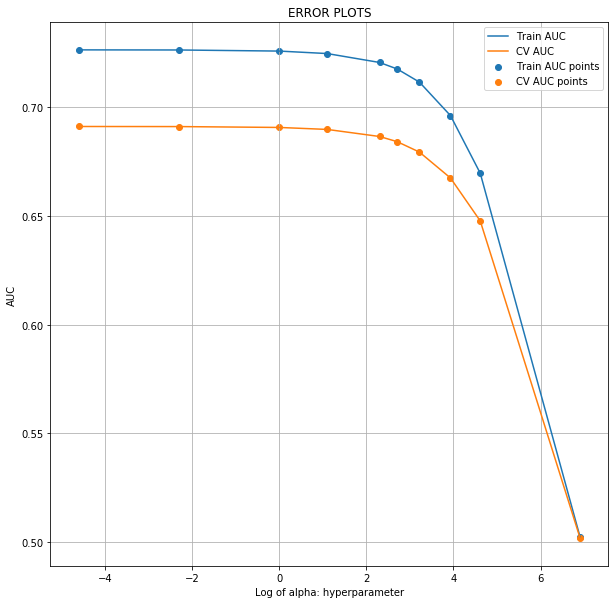

In [88]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math as m

train_auc = []
cv_auc = []
alpha = [0.01, 0.1, 1, 3, 10, 15, 25, 51, 101, 1001]
for i in tqdm(alpha):
    NB = MultinomialNB(alpha=i)
    NB.fit(X_tr_bow, y_train)

    y_train_pred = batch_predict(NB, X_tr_bow)    
    y_cv_pred = batch_predict(NB, X_cr_bow)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

log_alpha=[]
for j in alpha:
    log_alpha.append(m.log(j))
    
plt.figure(figsize=(10,10))
plt.plot(log_alpha, train_auc, label='Train AUC')
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Log of alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<h3> 1.5.1.2 Hyperparameter tuning using GridSearchCV

In [89]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from scipy.sparse import vstack

#Using class priors as the number of approved projects are very high compared to number of projects that are not approved

NB = MultinomialNB(class_prior=[0.5,0.5])

parameters = {'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}




#Using gridsearch with 10 fold Cross Validation

clf = GridSearchCV(NB, parameters, cv= 10, scoring='roc_auc',return_train_score=True)

clf.fit(X_tr_bow, y_train)


results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])





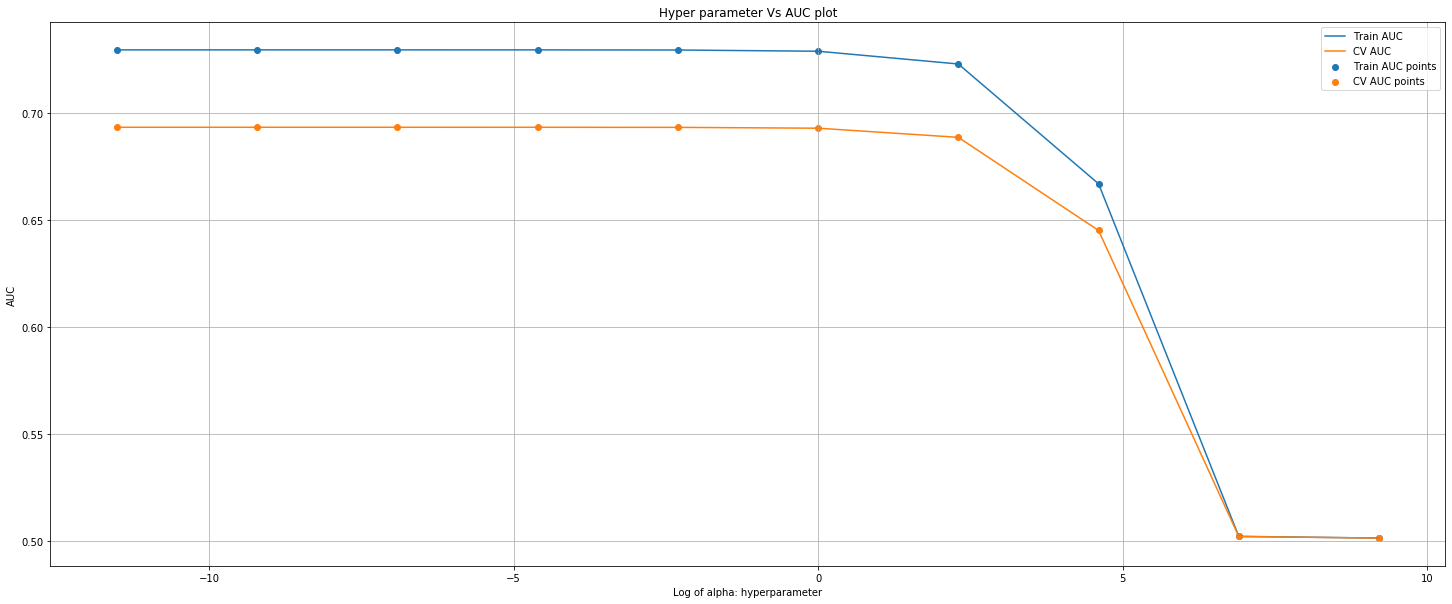

In [90]:
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']
log_alpha=[]
for j in alpha:
    log_alpha.append(m.log(j))

plt.figure(figsize=(25,10))
plt.plot(log_alpha, train_auc, label='Train AUC')

plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Log of alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()


In [91]:
results[['param_alpha','mean_train_score','mean_test_score']]

,param_alpha,mean_train_score,mean_test_score
0,1e-05,0.729477,0.693299
1,0.0001,0.729477,0.693299
2,0.001,0.729477,0.693299
3,0.01,0.729471,0.693294
4,0.1,0.729414,0.693252
5,1,0.728836,0.692864
6,10,0.722881,0.688590
7,100,0.666881,0.645063
8,1000,0.502064,0.502010
9,10000,0.501282,0.501265


From the results and error plot, we can see that the alha with value 0.001, 0.0001, 1e-05 have the same score. So, taking 0.001 as the best alpha value

<h3> 1.5.1.3 Testing the performance of the model on test data, plotting ROC Curves

In [108]:
best_alpha_BOW= 0.001

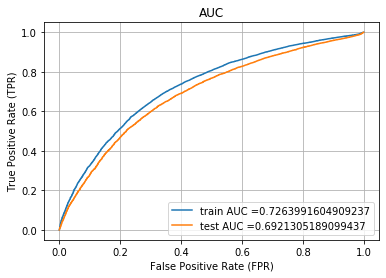

In [117]:
from sklearn.metrics import roc_curve, auc

#Using class priors as the number of approved projects are very high compared to number of projects that are not approved

NB_BOW = MultinomialNB(alpha= best_alpha_BOW,class_prior=[0.5,0.5])
NB_BOW.fit(X_tr_bow, y_train)

y_train_pred = batch_predict(NB_BOW, X_tr_bow)    
y_test_pred = batch_predict(NB_BOW, X_te_bow)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [118]:
BOW_AUC=auc(test_fpr, test_tpr)

<h3> 1.5.1.4 Confusion Matrix for BOW representation

In [119]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [120]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.45546758292698786 for threshold 0.5
Train confusion matrix
[[ 4949  2477]
 [13174 28441]]
Test confusion matrix
[[ 3411  2048]
 [10051 20542]]


### 1.5.2 Set 2:  categorical, numerical features + preprocessed_essay (TFIDF)

<h3>1.5.2.1 Hyperparameter tuning using simple for loop

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.86it/s]


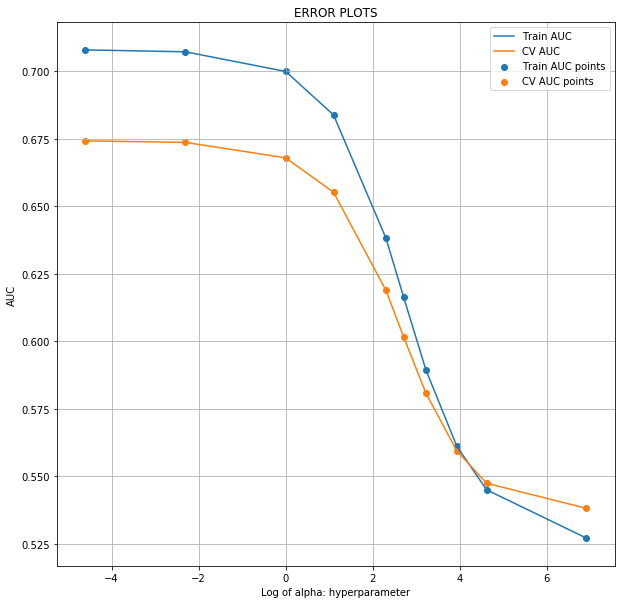

In [121]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score


train_auc = []
cv_auc = []
alpha = [0.01, 0.1, 1, 3, 10, 15, 25, 51, 101, 1001]
for i in tqdm(alpha):
    NB = MultinomialNB(alpha=i)
    NB.fit(X_tr_tfidf, y_train)

    y_train_pred = batch_predict(NB, X_tr_tfidf)    
    y_cv_pred = batch_predict(NB, X_cr_tfidf)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

log_alpha =[]
for j in alpha:
    log_alpha.append(m.log(j))
plt.figure(figsize=(10,10))
plt.plot(log_alpha, train_auc, label='Train AUC')
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Log of alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<h3> 1.5.2.2 Hyperparameter tuning using GridSearchCV

In [122]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from scipy.sparse import vstack

#Using class priors as the number of approved projects are very high compared to number of projects that are not approved

NB = MultinomialNB(class_prior=[0.5,0.5])

parameters = {'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}




#Using gridsearch with 10 fold Cross Validation

clf = GridSearchCV(NB, parameters, cv= 10, scoring='roc_auc',return_train_score=True)

clf.fit(X_tr_tfidf, y_train)


results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])





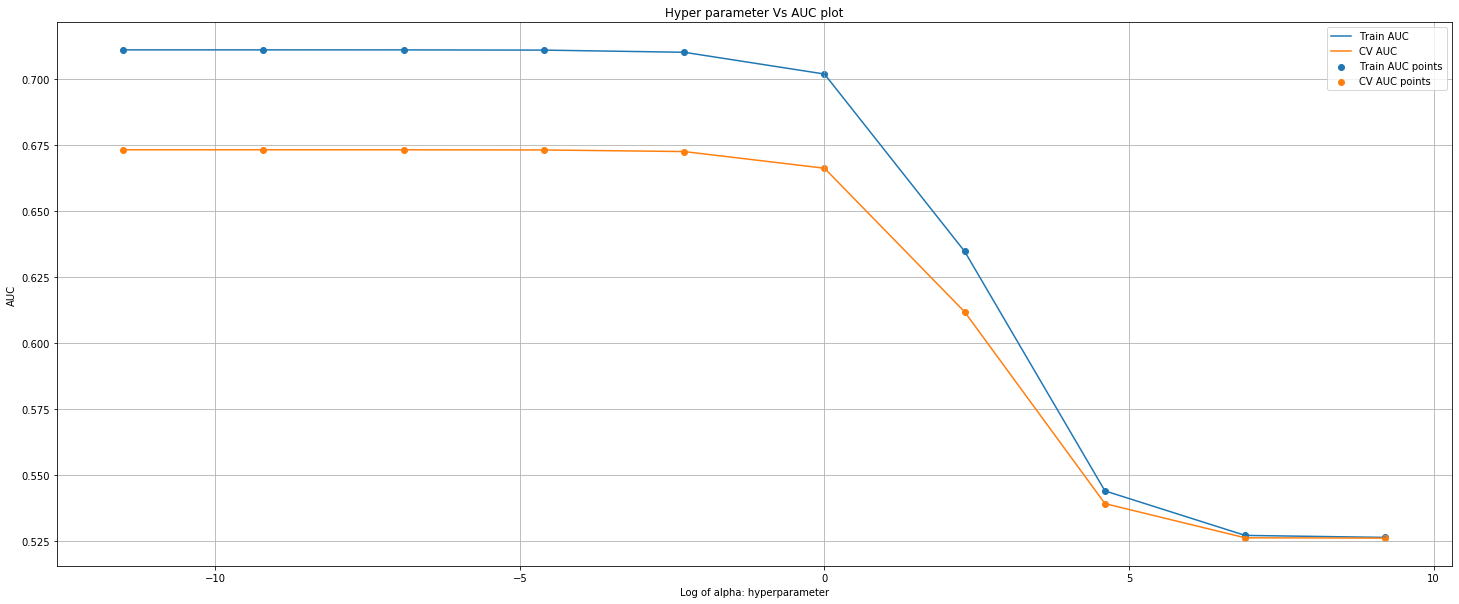

In [123]:
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']

log_alpha =[]
for j in alpha:
    log_alpha.append(m.log(j))

plt.figure(figsize=(25,10))
plt.plot(log_alpha, train_auc, label='Train AUC')

plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Log of alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()


In [124]:
results[['param_alpha','mean_train_score','mean_test_score']]

,param_alpha,mean_train_score,mean_test_score
0,1e-05,0.710992,0.673133
1,0.0001,0.710991,0.673134
2,0.001,0.710983,0.673126
3,0.01,0.710901,0.673068
4,0.1,0.710082,0.672461
5,1,0.701839,0.666152
6,10,0.634611,0.611693
7,100,0.543882,0.539066
8,1000,0.527013,0.526108
9,10000,0.526258,0.525997


From the results and error plot, we can see that the best alpha value is 0.0001

<h3> 1.5.2.3 Testing the performance of the model on test data, plotting ROC Curves

In [125]:
best_alpha_TFIDF=0.0001

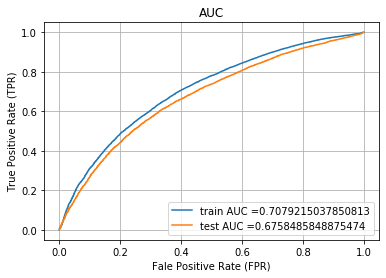

In [127]:
from sklearn.metrics import roc_curve, auc

#Using class priors as the number of approved projects are very high compared to number of projects that are not approved

NB_TFIDF = MultinomialNB(alpha= best_alpha_TFIDF,class_prior=[0.5,0.5])
NB_TFIDF.fit(X_tr_tfidf, y_train)

y_train_pred = batch_predict(NB_TFIDF, X_tr_tfidf)    
y_test_pred = batch_predict(NB_TFIDF, X_te_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Fale Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [128]:
TFIDF_AUC=auc(test_fpr, test_tpr)

<h3> 1.5.2.4 Confusion Matrix for TFIDF representation

In [129]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.42899625052975743 for threshold 0.508
Train confusion matrix
[[ 4954  2472]
 [14854 26761]]
Test confusion matrix
[[ 3475  1984]
 [11275 19318]]


<h1> 1.6 Top 20 Features

<h3> 1.6.1 Top 20 features for BOW representation

In [130]:
NB_BOW = MultinomialNB(alpha = 0.001,class_prior=[0.5,0.5])

NB_BOW.fit(X_tr_bow, y_train)

MultinomialNB(alpha=0.001, class_prior=[0.5, 0.5], fit_prior=True)

In [131]:
positive_NB_BOW_features_log_prob=NB_BOW.feature_log_prob_[1]

negative_NB_BOW_features_log_prob=NB_BOW.feature_log_prob_[0]

In [132]:
positive_NB_BOW_feature_indices= np.argsort(positive_NB_BOW_features_log_prob)[::-1]

negative_NB_BOW_feature_indices= np.argsort(negative_NB_BOW_features_log_prob)[::-1]

In [133]:
top_20_pos_feature_indices_BOW = positive_NB_BOW_feature_indices[0:20]

top_20_neg_feature_indices_BOW = negative_NB_BOW_feature_indices[0:20]

In [134]:
Feature_names_BOW=[]

for i in essay_vectorizer_bow.get_feature_names():
    Feature_names_BOW.append(i)

for i in school_state_vectorizer.get_feature_names():
    Feature_names_BOW.append(i)

for i in teacher_prefix_vectorizer.get_feature_names():
    Feature_names_BOW.append(i)
    
for i in project_grade_category_vectorizer.get_feature_names():
    Feature_names_BOW.append(i)
    
for i in clean_categories_vectorizer.get_feature_names():
    Feature_names_BOW.append(i)

for i in clean_subcategories_vectorizer.get_feature_names():
    Feature_names_BOW.append(i)

In [135]:
Feature_names_BOW.append('Price')

Feature_names_BOW.append('teacher_prev_projects')

In [136]:
print('Top 20 Positive features for BOW Representation:')
for i in top_20_pos_feature_indices_BOW:
    print(Feature_names_BOW[i])

Top 20 Positive features for BOW Representation:
students
school
my
learning
classroom
the
they
not
my students
learn
help
many
nannan
we
work
reading
need
use
love
day


In [137]:
print('Top 20 Negative features for BOW Representation:')
for i in top_20_neg_feature_indices_BOW:
    print(Feature_names_BOW[i])

Top 20 Negative features for BOW Representation:
students
school
learning
my
classroom
not
learn
they
help
my students
the
nannan
many
we
need
work
love
come
reading
able


<h3> 1.6.2 Top 20 features for TFIDF representation

In [138]:
NB_TFIDF = MultinomialNB(alpha = 0.0001,class_prior=[0.5,0.5])

NB_TFIDF.fit(X_tr_tfidf, y_train)

MultinomialNB(alpha=0.0001, class_prior=[0.5, 0.5], fit_prior=True)

In [139]:
positive_NB_TFIDF_features_log_prob=NB_TFIDF.feature_log_prob_[1]

negative_NB_TFIDF_features_log_prob=NB_TFIDF.feature_log_prob_[0]

In [140]:
positive_NB_TFIDF_feature_indices= np.argsort(positive_NB_TFIDF_features_log_prob)[::-1]

negative_NB_TFIDF_feature_indices= np.argsort(negative_NB_TFIDF_features_log_prob)[::-1]

In [141]:
top_20_pos_feature_indices_TFIDF = positive_NB_TFIDF_feature_indices[0:20]

top_20_neg_feature_indices_TFIDF = negative_NB_TFIDF_feature_indices[0:20]

In [142]:
Feature_names_TFIDF=[]

for i in essay_vectorizer_tfidf.get_feature_names():
    Feature_names_TFIDF.append(i)

for i in school_state_vectorizer.get_feature_names():
    Feature_names_TFIDF.append(i)

for i in teacher_prefix_vectorizer.get_feature_names():
    Feature_names_TFIDF.append(i)
    
for i in project_grade_category_vectorizer.get_feature_names():
    Feature_names_TFIDF.append(i)
    
for i in clean_categories_vectorizer.get_feature_names():
    Feature_names_TFIDF.append(i)

for i in clean_subcategories_vectorizer.get_feature_names():
    Feature_names_TFIDF.append(i)

In [143]:
Feature_names_TFIDF.append('Price')

Feature_names_TFIDF.append('teacher_prev_projects')

In [144]:
print('Top 20 Positive features for TFIDF Representation:')
for i in top_20_pos_feature_indices_TFIDF:
    print(Feature_names_TFIDF[i])

Top 20 Positive features for TFIDF Representation:
mrs
literacy_language
grades_prek_2
math_science
ms
grades_3_5
literacy
mathematics
literature_writing
grades_6_8
ca
health_sports
specialneeds
specialneeds
students
appliedlearning
grades_9_12
mr
appliedsciences
health_wellness


In [145]:
print('Top 20 Negative features for BOW Representation:')
for i in top_20_neg_feature_indices_TFIDF:
    print(Feature_names_TFIDF[i])

Top 20 Negative features for BOW Representation:
mrs
literacy_language
grades_prek_2
math_science
ms
grades_3_5
literacy
mathematics
literature_writing
grades_6_8
specialneeds
specialneeds
health_sports
ca
appliedlearning
students
appliedsciences
grades_9_12
mr
music_arts


<h1>3. Summary

In [146]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter - Alpha", "Test AUC"]

x.add_row(["BOW", "Naive Bayes", best_alpha_BOW, BOW_AUC])
x.add_row(["TFIDF", "Naive Bayes", best_alpha_TFIDF, TFIDF_AUC])

print(x)

+------------+-------------+-------------------------+--------------------+
| Vectorizer |    Model    | Hyper Parameter - Alpha |      Test AUC      |
+------------+-------------+-------------------------+--------------------+
|    BOW     | Naive Bayes |          0.001          | 0.6921305189099437 |
|   TFIDF    | Naive Bayes |          0.0001         | 0.6758485848875474 |
+------------+-------------+-------------------------+--------------------+
